In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from scipy import  stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
for i in range(0,1):
    link_name = "link_travel_time\link_" + str(i) + ".csv"
    data = pd.read_csv(link_name)

In [36]:
d = []
for i in range(31):
    d.append(data.values[i*240+30,1])

In [45]:
length = 240
#dta = pd.Series(d,dtype=float)
dta = pd.Series(data.values[0:length,1],dtype=float)

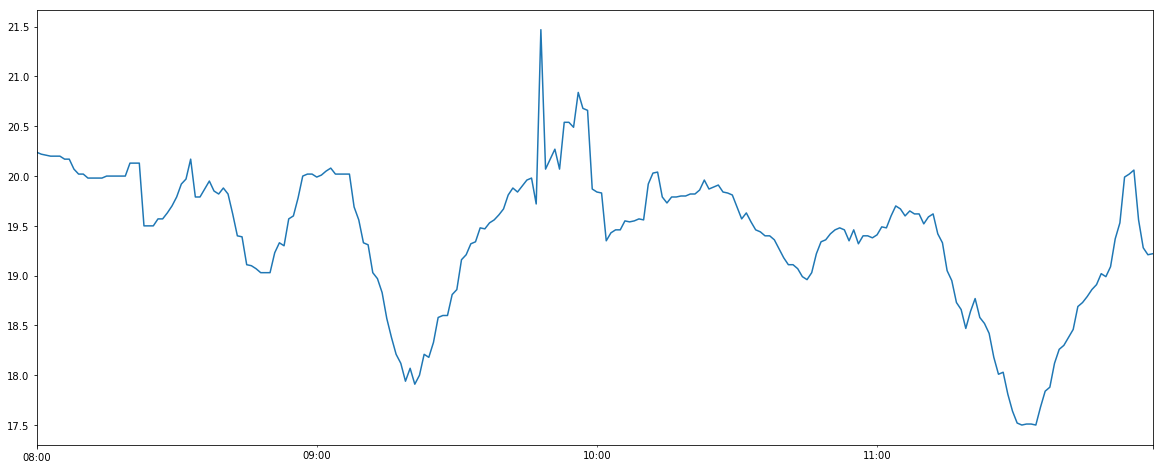

In [47]:
dta.index = pd.Index(pd.date_range('7/1/2012 08:00',periods=length, freq='min'))
#dta.index = pd.Index(pd.date_range('7/1/2012 8:30',periods=length, freq='D'))
dta.plot(figsize=(20,8))
plt.show()

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  


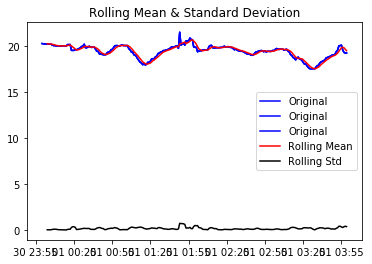

Results of Dickey-Fuller Test:
Test Statistic                  -2.819566
p-value                          0.055533
#Lags Used                       3.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [20]:
from statsmodels.tsa.stattools import adfuller
timeseries = dta   
#Determing rolling statistics
window = 5
rolmean = pd.rolling_mean(timeseries, window)
rolstd = pd.rolling_std(timeseries, window)

#Plot rolling statistics:
orig = plt.plot(timeseries, color='blue',label='Original')
#tail = int(np.floor(window/2))
#mean = rolmean.values[tail:len(rolmean.values)]
#mean = [mean,np.zeros(tail)]
#rolmean.values = mean
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(timeseries, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

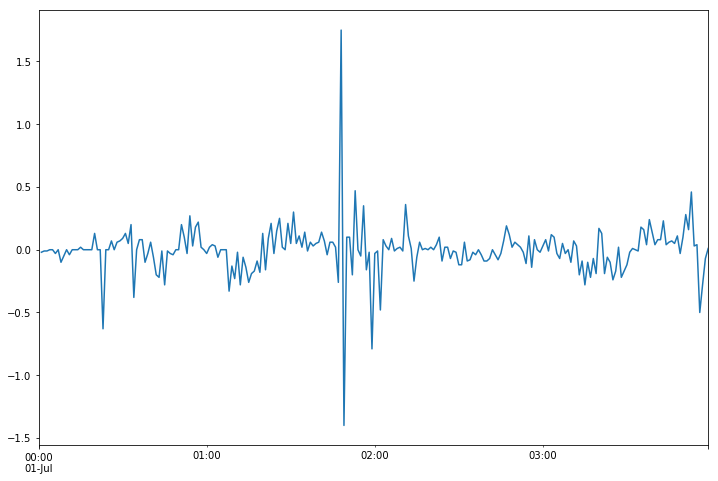

In [21]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax2)
plt.show()

In [22]:
decomposition = seasonal_decompose(dta, freq=240)  
fig = decomposition.plot()
plt.show()

ValueError: operands could not be broadcast together with shapes (240,) (242,) 

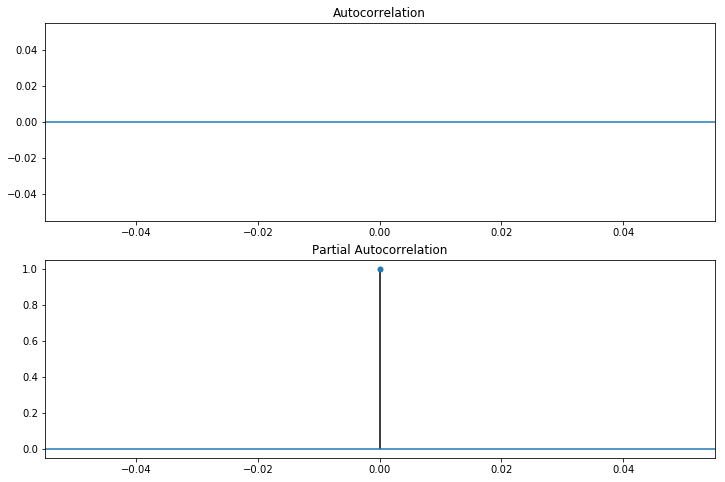

In [24]:
diff1= dta.diff(1)    # order of difference is 1
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rolmean,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rolmean,lags=40,ax=ax2)
plt.show()

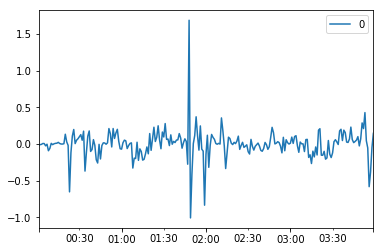

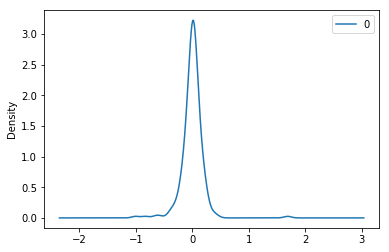

                0
count  239.000000
mean     0.000019
std      0.196650
min     -1.006965
25%     -0.064681
50%      0.008705
75%      0.070521
max      1.688031


In [209]:
model = ARIMA(dta,order=(4,1,0))
model_fit = model.fit(trend='c',disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [210]:
arma_mod11 = ARIMA(dta,(1,1,0)).fit()
print(arma_mod11.aic,arma_mod11.bic,arma_mod11.hqic)
arma_mod21 = ARIMA(dta,(2,1,0)).fit()
print(arma_mod21.aic,arma_mod21.bic,arma_mod21.hqic)
arma_mod31 = ARIMA(dta,(3,1,0)).fit()
print(arma_mod31.aic,arma_mod31.bic,arma_mod31.hqic)
arma_mod41 = ARIMA(dta,(4,1,0)).fit()
print(arma_mod41.aic,arma_mod41.bic,arma_mod41.hqic)
arma_mod51 = ARIMA(dta,(5,1,0)).fit()
print(arma_mod51.aic,arma_mod51.bic,arma_mod51.hqic)

arma_mod11 = ARIMA(dta,(1,1,1)).fit()
print(arma_mod11.aic,arma_mod11.bic,arma_mod11.hqic)
arma_mod21 = ARIMA(dta,(2,1,1)).fit()
print(arma_mod21.aic,arma_mod21.bic,arma_mod21.hqic)
arma_mod31 = ARIMA(dta,(1,1,2)).fit()
print(arma_mod31.aic,arma_mod31.bic,arma_mod31.hqic)
arma_mod41 = ARIMA(dta,(2,1,2)).fit()
print(arma_mod41.aic,arma_mod41.bic,arma_mod41.hqic)
arma_mod51 = ARIMA(dta,(1,1,3)).fit()
print(arma_mod51.aic,arma_mod51.bic,arma_mod51.hqic)

-79.96282290864394 -69.5334322528 -75.7600655762
-81.87497438869798 -67.969120181 -76.2712979455
-89.85415255036253 -72.4718347907 -82.8495569963
-87.93427373203883 -67.0754924204 -79.5287590672
-86.44690975982746 -62.1116648963 -76.6404759842
-79.25027992320088 -65.3444257155 -73.64660348
-85.65663954303125 -68.2743217834 -78.652043989
-87.72492274981107 -70.3426049902 -80.7203271958
-85.72492276910089 -64.8661414575 -77.3194081043
-86.36178517356416 -65.503003862 -77.9562705087


In [61]:
series = rolmean
X = series.values
size = 200
train, test = X[4:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
step_in_buffer = 10
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='c',disp=0)
    #print(model_fit.arparams)
    #print(model_fit.maparams)
    yhat = model_fit.forecast(step_in_buffer+1)[0][min(t,step_in_buffer)]
    print (yhat)
    #yhat = model_fit.forecast()[0]
    #yhat = model_fit.arparams[0]*history[len(history)-3] + model_fit.arparams[1]*history[len(history)-2] + model_fit.arparams[2]*history[len(history)-1]
    
    '''
    #forecast according to day information
    day_dt = data.iloc[t+size,1:32]
    day_dt = pd.Series(day_dt,dtype = 'float')
    day_X = day_dt.values
    d_train, d_test = day_X[0:len(day_X)-1], day_X[len(day_X)-1]
    d_history = [x for x in d_train]   
    d_model = ARIMA(d_history, order=(1,0,0))
    d_model_fit = d_model.fit(disp=0)
    d_output = d_model_fit.forecast()[0]
    #print(d_output)
    '''
    
    predictions.append(yhat)
    
    if t >= step_in_buffer:
    #    history.append(X[len(history)])
    
    #if step_in_buffer > 0:
        #if t >= step_in_buffer:
            #history[len(history)-step_in_buffer+1] = X[len(history)-step_in_buffer+1]
        #history.append(yhat)
    #else:
        history = history[0:len(history)]
        history.append(X[len(history)])
    
    '''i = range(len(history))
    plt.plot(i,history,color='red')
    plt.plot(i,X[0:len(history)],color='blue')
    plt.show()'''
    
    #print('predicted=%f, expected=%f' % (yhat, obs))

18.6351442288
18.5257926476
18.4379660935
18.3669852194
18.3091879262
18.2617082224
18.2223031568
18.189217376
18.1610771243
18.1368072883
18.1155664744
20.4723213354
18.8150746622
18.6850738662
18.473122977
18.5079058426
18.5314004279


D:\Software\Anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18.5082407659
18.4819171369
18.4955534419
18.2915502077
18.0503749852
17.9911991617
17.7969278434
17.6109823066
17.5051162653
17.4408679628
17.3288994726
17.3300025367
17.3472116955
17.4669418545
17.5904865019
17.6776801593
17.8777785733
18.0865248649
18.1767916619
18.2673173575
18.4034324377
18.5217575462
18.5896018772


Test MSE: 1.163
Lag MSE: 0.955
vs MSE: 1.218


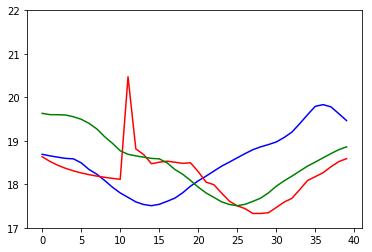

In [62]:
# evaluation of errors
error = mean_squared_error(test, predictions)
error_lag = mean_squared_error(X[size:len(X)-1],X[size-step_in_buffer-1:len(X)-step_in_buffer-2])
print('Test MSE: %.3f\nLag MSE: %.3f\nvs MSE: %.3f' % (error,error_lag,error/error_lag))
# plot
plt.plot(test,color='blue')
plt.plot(predictions, color='red')
lag = X[size-step_in_buffer-1:len(X)-step_in_buffer-1]
i = range(len(lag))
plt.plot(i,lag,color='green')
plt.ylim((17,22))
plt.show()